# DATA 601 Introduction to Data Science (03.7420) SP2020
## week 8 - assignment - imputation
### Assignment Content

Each XLS or XLSX file contains a dataframe.

Load each XLS or XLSX file in your Jupyter notebook.

For each dataframe, address missing values by taking the following steps:

Count the number of missing values in the dataframe; count the number of missing values per column
Plot the distribution of data points using a histogram
Create a lag plot (a lag plot shows t versus t+1)
Based on the lag plot, state in a markdown cell whether the order of this data matters.
Do one of the following (not both):
If the order of the data matters, then interpolate the missing values
If the order of the data does not matter, fill in the missing data by sampling from the distribution
Create a scatter plot using the columns in dataframe; no Nan entries should be present
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.

Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
from pandas.plotting import lag_plot
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Loading each excel file to dataframe
df1 = pd.read_excel('imputation_homework_04.xls')
df2 = pd.read_excel('imputation_homework_29.xlsx')
df3 = pd.read_excel('imputation_homework_91.xlsx')

## Finding number of null values in each dataframe

In [2]:
# isna() returns "True" for every null value and sum() returns total
df1.isna().sum()

Unnamed: 0     0
time           0
value         50
dtype: int64

In [3]:
df2.isna().sum()

Unnamed: 0    0
x             9
y             0
dtype: int64

In [4]:
df3.isna().sum()

Unnamed: 0     0
date           0
value         84
dtype: int64

## Histogram plots of each dataframe

Text(0, 0.5, 'value')

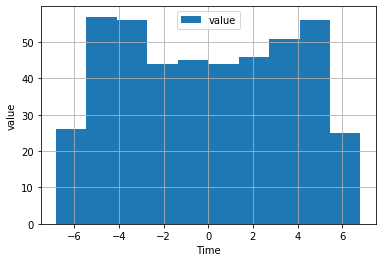

In [5]:
df1.plot(kind='hist', x='time', y='value')
plt.grid()
plt.xlabel('Time')
plt.ylabel('value')

Text(0, 0.5, 'X')

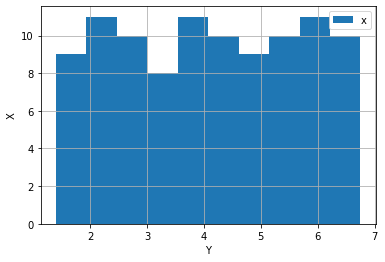

In [6]:
df2.plot(kind='hist', x='y', y='x')
plt.grid()
plt.xlabel('Y')
plt.ylabel('X')

Text(0, 0.5, 'Value')

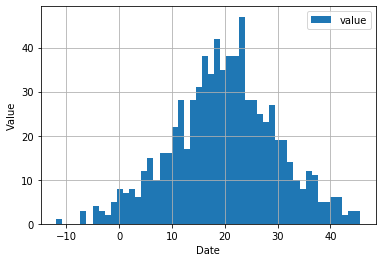

In [7]:
df3.plot(kind='hist',x='date',y='value',bins=50)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Value')

## Lag_plots for each data frame

### From the graph below, we can see that order of the data matters since there is correlation present in the values of the dataframe

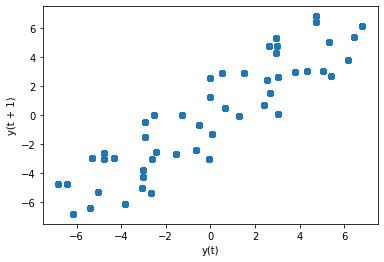

In [8]:
# lagplot is a kind of scatter plot used for checking randomness inthe data distributed
lag_plot(df1.value)

### The below lag plot has 8 null values and are linearly distributed. So the order if the data matters

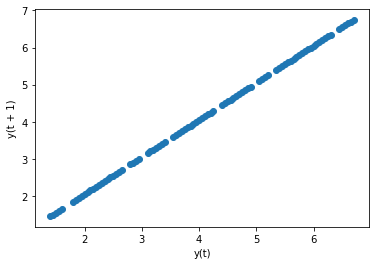

In [9]:
lag_plot(df2.x)

### From the lagplot below, the data is randomly distributed so, the order of the data doesn't matter

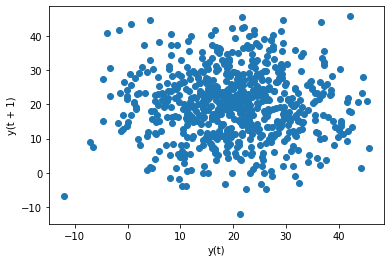

In [10]:
lag_plot(df3.value)

### Interpolation is done to replace missing values in the df1 and df2, since the order of the data matters

In [11]:
#interpolate() is pandasdf.series method used for intepolating values from existing data
df1.value = df1.value.interpolate()

In [12]:
# checking for null values after replacing missing data 
df1.isna().sum()

Unnamed: 0    0
time          0
value         0
dtype: int64

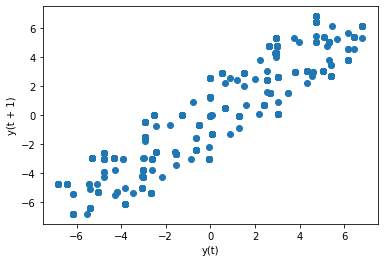

In [13]:
#lag plot with no null data in the df1
lag_plot(df1.value)

In [14]:
df2.x = df2.x.interpolate()

In [15]:
# checking for null values after replacing missing data
df2.isna().sum()

Unnamed: 0    0
x             0
y             0
dtype: int64

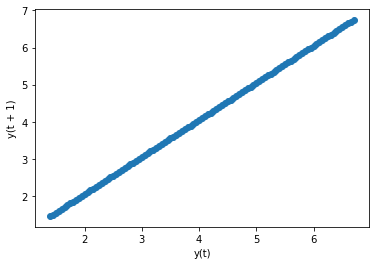

In [16]:
#lag plot with no null data in the df2
lag_plot(df2.x)


### Order of the data doesn't matter in randomly distributed values of the dataframe 'df3', sampling is done to replace the missing value

In [17]:
# All values inthe 'value' column of df3 are listed in 'df3_all_values_list'
df3_all_value_list = df3.value.to_list()

# Filtering for 'nan' in the list above
df3_value_list = [x for x in df3_all_value_list if str(x) != 'nan']

# replacing all the null values with the of existing values
for i in range(len(df3['value'])):
    pd.set_option('mode.chained_assignment', None)
    if str(df3.value[i]) == 'nan':
        df3.value[i] = random.choice(df3_value_list)

In [18]:
# Checking for nul values after replacing missing values
df3.isna().sum()

Unnamed: 0    0
date          0
value         0
dtype: int64

### Scatter plots of the dataframes df1,df2 and df3

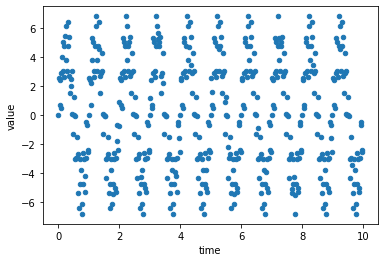

In [19]:
df1.plot.scatter('time','value')

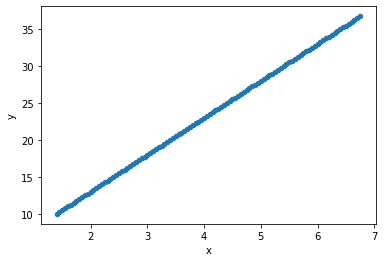

In [20]:
df2.plot.scatter('x','y')

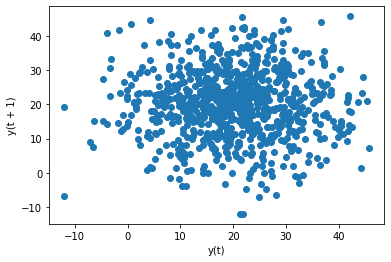

In [24]:
lag_plot(df3.value)